In [243]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, hierarchical, AgglomerativeClustering, MiniBatchKMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, silhouette_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

import scipy.cluster.hierarchy as shc


In [268]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

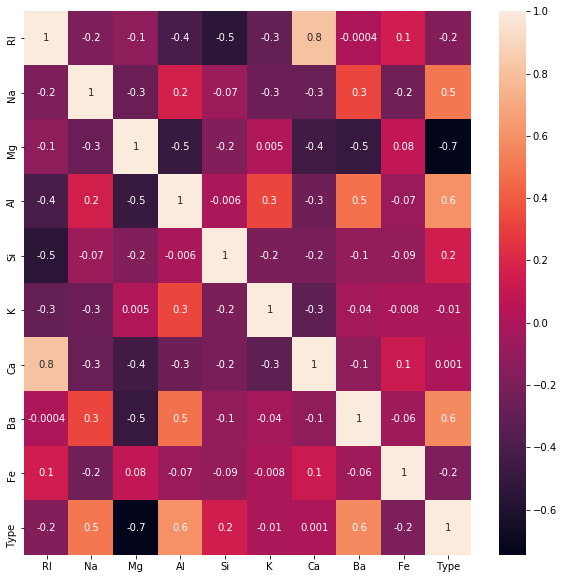

In [269]:
plt.figure(figsize=(10,10))
corr = sns.heatmap(df.corr(), annot=True, fmt='.1g');

In [270]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Type']), df.Type, test_size=.2)

In [285]:
# now let's instantiate a PCA object so we can do some dimensionality reduction and account for multicollinearity
pca = PCA(n_components=4)

In [286]:
pca_data = pca.fit_transform(x_train)

In [287]:
pca.explained_variance_ratio_

array([0.47512912, 0.25162727, 0.11522391, 0.10349119])

In [288]:
pca.explained_variance_ratio_.sum()

0.9454714887378246

In [289]:
len(x_train)
y_train.isna().value_counts()

False    171
Name: Type, dtype: int64

In [290]:
y_train.value_counts()

2    62
1    54
7    23
3    13
5    12
6     7
Name: Type, dtype: int64

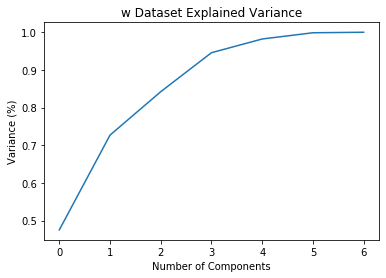

In [284]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('w Dataset Explained Variance')
plt.show()

In [291]:
km = KMeans(n_clusters=3)


In [292]:
 km.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [293]:
predicted = km.predict(pca_data)

In [294]:
predicted

array([2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2], dtype=int32)

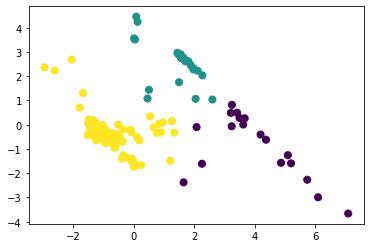

In [298]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predicted, s=50, cmap='viridis');
plt.show();

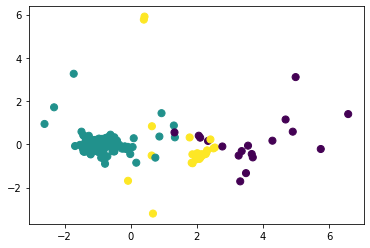

In [257]:
plt.scatter(pca_data[:, 0], pca_data[:, 2], c=predicted, s=50, cmap='viridis');
plt.show();

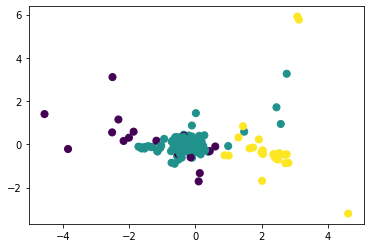

In [258]:
plt.scatter(pca_data[:, 1], pca_data[:, 2], c=predicted, s=50, cmap='viridis');
plt.show();

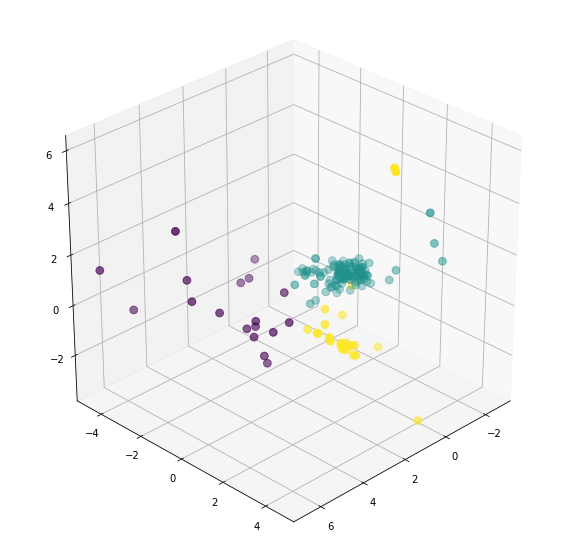

In [259]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1],pca_data[:,2], c=predicted, s=60)
ax.view_init(30, 45)
plt.show()

In [299]:
silhouette_score(pca_data, predicted)

0.5854677498074954

In [300]:
km_standard = KMeans(n_clusters=3)
km_standard.fit(x_train)
predicted_std = km_standard.predict(x_train)
silhouette_score(x_train, predicted_std)


0.5707291586212717

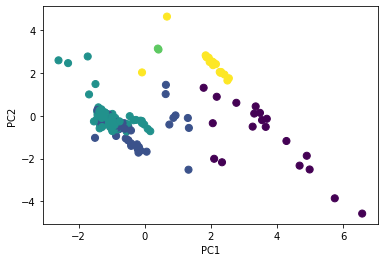

In [262]:
aggcl = AgglomerativeClustering(n_clusters=5)
predicted_agg = aggcl.fit_predict(pca_data)
plt.figure(figsize=(6,4))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predicted_agg, s=50, cmap='viridis');

In [263]:
silhouette_score(pca_data, predicted)


0.5900760717781433

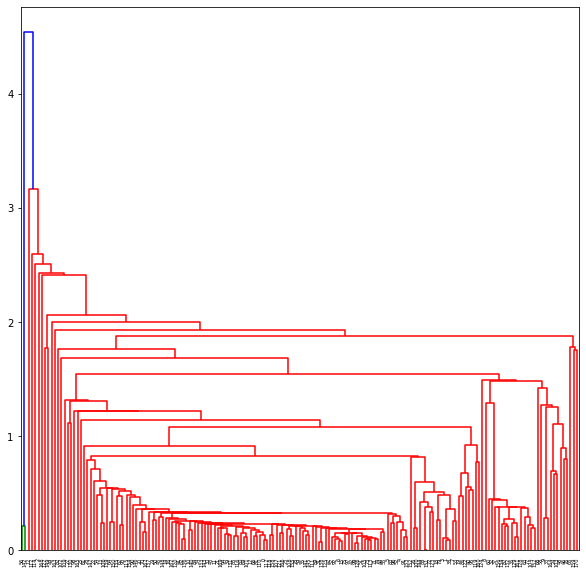

In [301]:
linked = shc.linkage(pca_data, 'single')
plt.figure(figsize=(10, 10))
# Step 2: Plot the hierarchical clustering as a dendrogram
shc.dendrogram(linked)
plt.show()

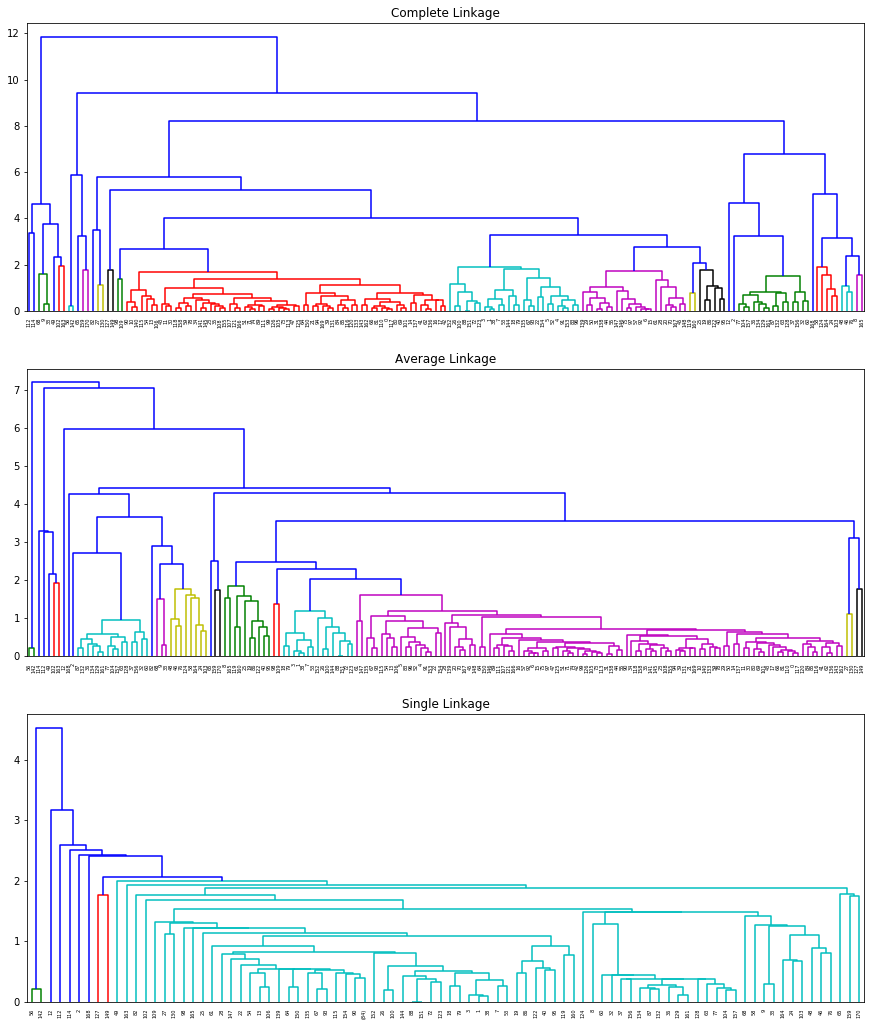

In [302]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

# This time we define linkage through functions instead of an argument
for linkage, cluster, ax in zip([shc.complete(pca_data),
                                 shc.average(pca_data),
                                 shc.single(pca_data)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    shc.dendrogram(linkage, ax=ax, color_threshold=2, truncate_mode='level',
                  )

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

Converged after 65 iterations.


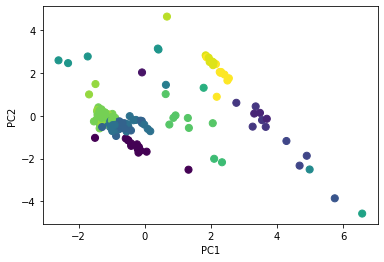

In [236]:
aff = AffinityPropagation(damping=.5, verbose=1)
predicted_aff = aff.fit_predict(pca_data)
plt.figure(figsize=(6,4))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=predicted_aff, s=50, cmap='viridis');